# Introduction
What makes a neighborhood favorable to own a car in? Well, if you want to keep your car in good shape, you'll likely want to steer away from neighborhoods with bad roads and intersections. The data set I chose was "Signalized Intersections", which lists every signalized intersection in Pittsburgh. A signalized intersection is an intersection where traffic is controlled by official traffic-control signals (stop lights and pedestrain crosswalks). So, when a neighborhood has more signalized intersections, it is less likely do get got up in a bad accident.

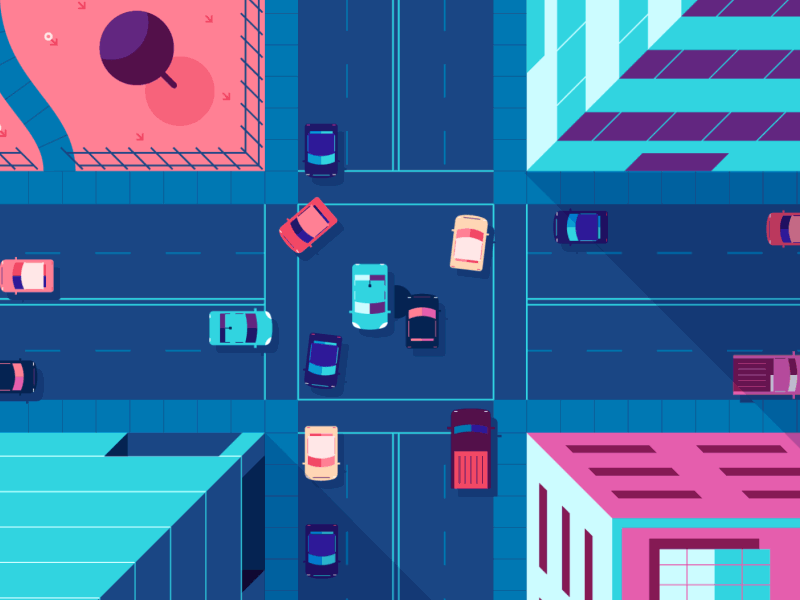

So, we are looking for the neighborhoods with the greatest amount of signalized intersections. Here's a look at the data:

Hays                          1
Arlington                     1
Terrace Village               1
St. Clair                     1
East Carnegie                 1
                             ..
Squirrel Hill South          30
Bloomfield                   30
East Liberty                 31
Shadyside                    35
Central Business District    87
Name: neighborhood, Length: 82, dtype: int64


Text(0, 0.5, 'Identified Signalized Intersections')

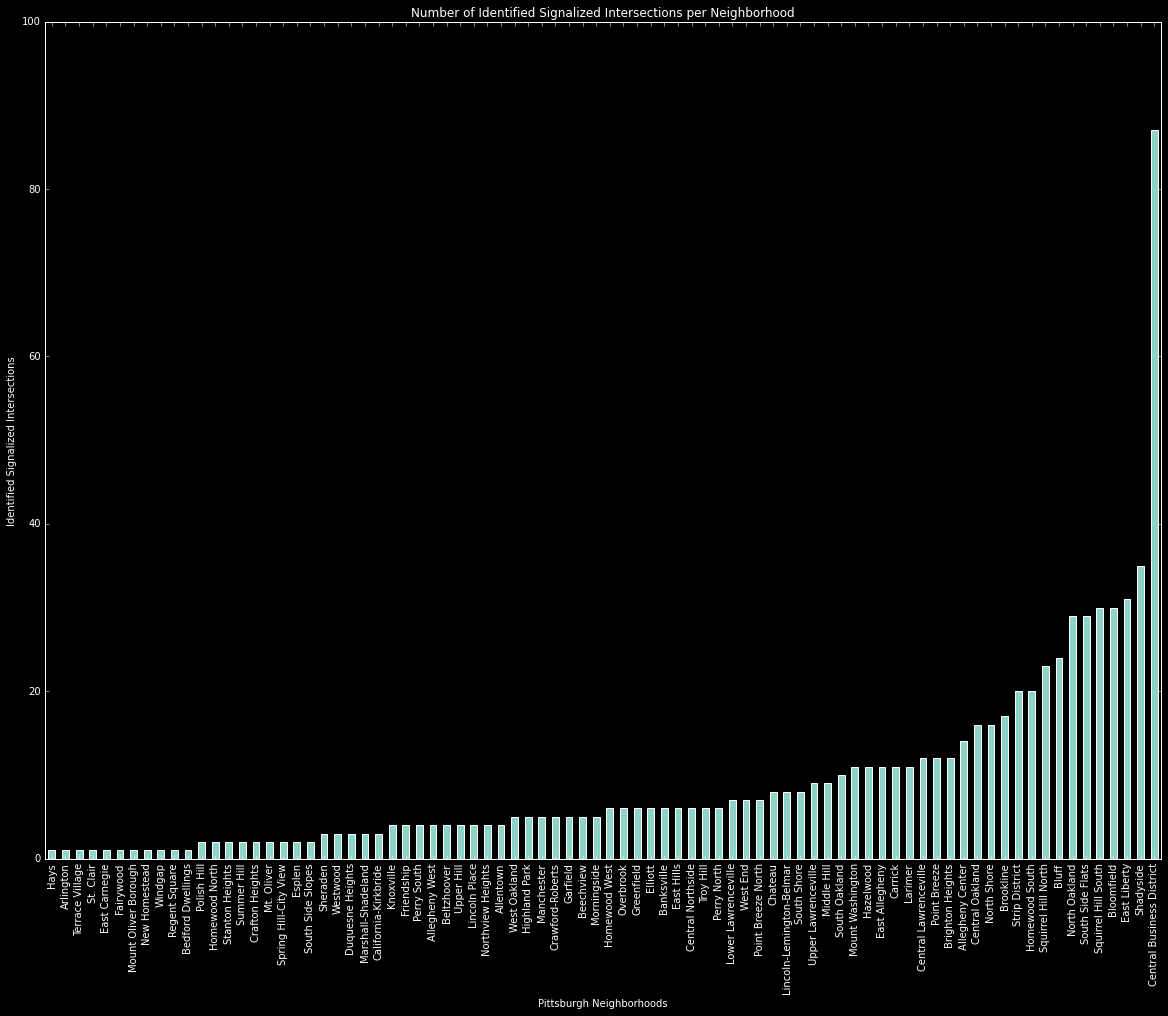

In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

#Import data from data set
data = pd.read_csv("signalizedintersections.csv", index_col = "id")
#Gets the amount of signalized intersection entries per neighborhood and sorts from least to greatest
data_plot = data["neighborhood"].value_counts().sort_values(ascending = True)

#See specific amounts for each neighborhood
print(data_plot)

#Bar Graph
plt.style.use('dark_background')
data_plot.plot.bar(figsize=(20,15), ylim=[0,100])
plt.title("Number of Identified Signalized Intersections per Neighborhood")
plt.xlabel("Pittsburgh Neighborhoods")
plt.ylabel("Identified Signalized Intersections")

Hmm... to no surprise, Pittsburgh's "Central Business District" (Downtown) is the neighborhood that has the most signalized intersections in Pittsburgh based off the dataset. Shadyside in second place with 35, and East Liberty in third with 31. (We will assume that any intersections that were not accounted for do not greatly affect our ratios.)

# Winners for Most Signalized Intersections:
## 1. Downtown 🥇
### 2. Shadyside 🥈
#### 3. East Liberty 🥉

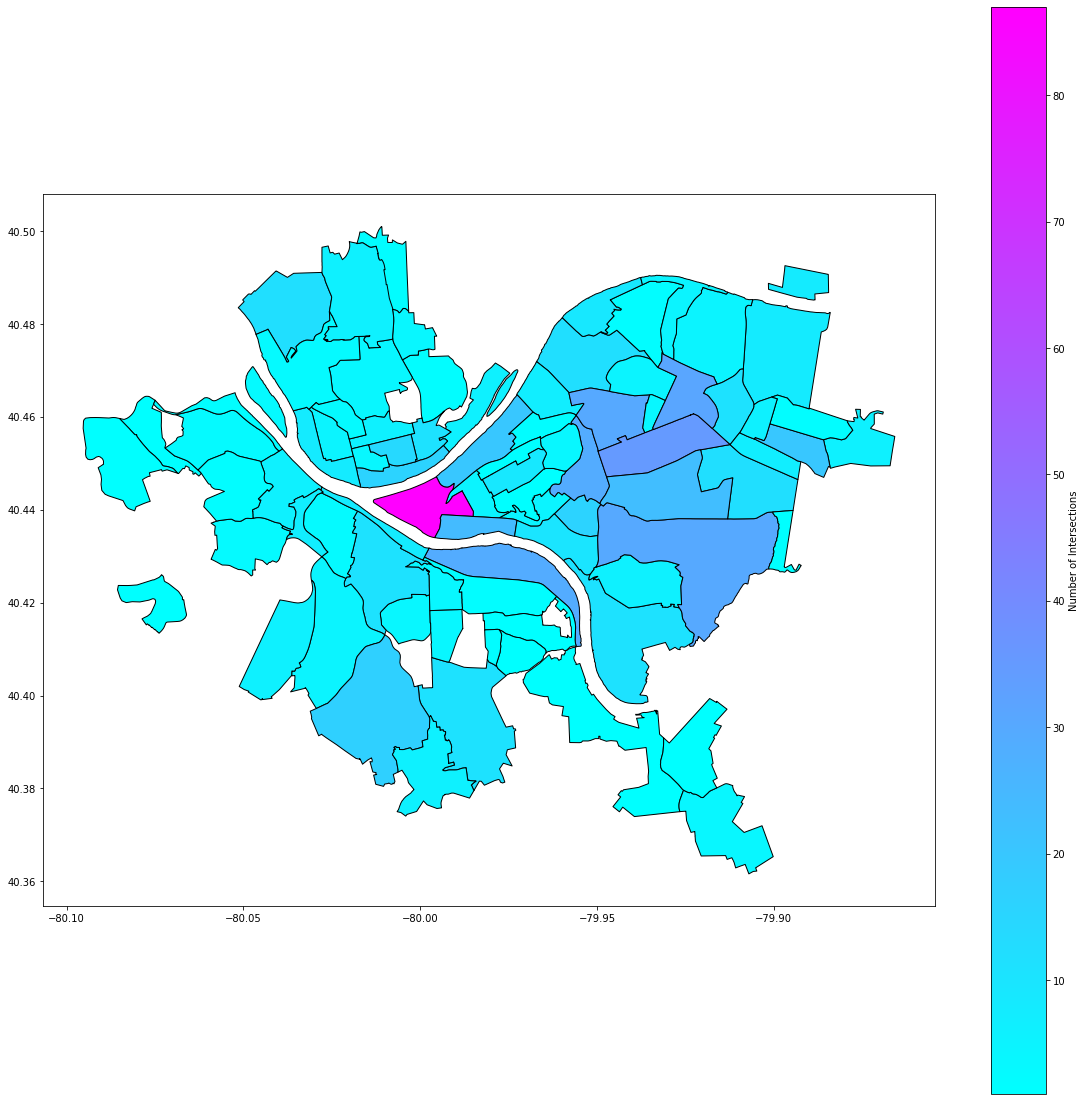

In [23]:
#gets the data set again
data = pd.read_csv("signalizedintersections.csv", index_col = "id")
data["number_of_intersections"] = 1

#groups the neighborhoods and entires for each
intersections = data.groupby("neighborhood").sum()["number_of_intersections"]
intersections.sort_values(ascending = False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
intersection_map = neighborhoods.merge(intersections, how = 'left', left_on = 'hood',right_on = 'neighborhood')
intersection_map.plot(column = 'number_of_intersections', cmap = 'cool', edgecolor = "black", legend = True, legend_kwds = {'label': "Number of Intersections"}, figsize=(20,20))

# Conclusion
From the bar graph and intersection map, we can see that Downtown is very much ahead in terms of signalized intersections. This may be a bias in the dataset, but it also makes sense for a high-traffic area to implement more regulated road systems. Based on the overall metric of "safest neighborhood to own a car in", these neighborhoods that have more signalized intersections can reflect on how safe it is to drive there (or where the roads are most regulated). So the winners here are Downtown, Shadyside, and East Liberty!